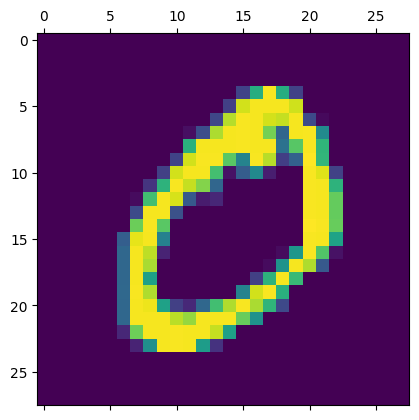

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.8990 - loss: 0.3289
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9855 - loss: 0.0462
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9915 - loss: 0.0288
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9926 - loss: 0.0231
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9947 - loss: 0.0162
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9957 - loss: 0.0132
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9969 - loss: 0.0098
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9973 - loss: 0.0088
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9973 - loss: 0.0084
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9978 - loss: 0.0068


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,datasets,layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0
x_train[0]
plt.matshow(x_train[1].reshape(28,28))
plt.show()
Cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
Cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
Cnn.fit(x_train,y_train,epochs=10)




In [ ]:
Cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9896 - loss: 0.0412


[0.03330180048942566, 0.9919999837875366]

In [ ]:
y_predicted=Cnn.predict(x_test)
y_predicted[1]
np.argmax(y_predicted[1])




313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


2

In [ ]:
y_test[1]


2

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cf=confusion_matrix(y_test,y_predicted_labels)
cf

array([[ 977,    1,    1,    0,    0,    0,    0,    1,    0,    0],
       [   1, 1129,    0,    0,    2,    0,    1,    2,    0,    0],
       [   0,    0, 1028,    0,    0,    0,    0,    4,    0,    0],
       [   0,    0,    1, 1007,    0,    1,    0,    1,    0,    0],
       [   0,    0,    0,    0,  977,    0,    3,    0,    0,    2],
       [   2,    0,    0,    8,    0,  879,    3,    0,    0,    0],
       [   3,    1,    0,    0,    0,    0,  953,    0,    1,    0],
       [   0,    3,    1,    1,    1,    0,    0, 1018,    1,    3],
       [   1,    0,    3,    0,    1,    0,    1,    0,  965,    3],
       [   1,    0,    0,    0,   15,    3,    0,    3,    0,  987]])

Text(95.72222222222221, 0.5, 'Truth')

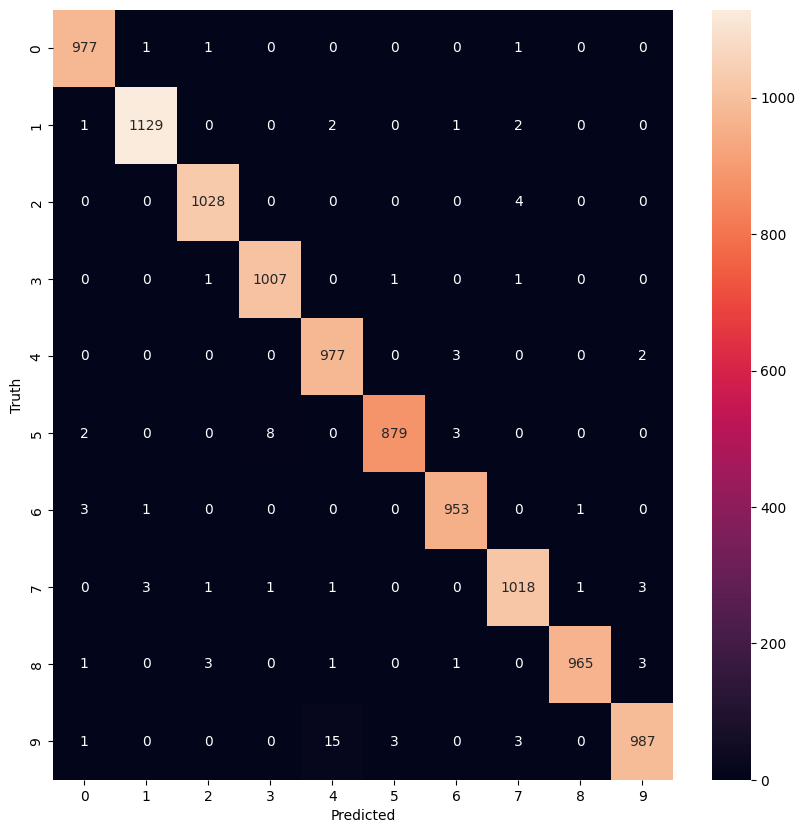

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cf,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
classification_report(y_test,y_predicted_labels)
print(classification_report(y_test,y_predicted_labels))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

